<a href="https://colab.research.google.com/github/misbahsy/APMonitor-do/blob/master/DynamicControl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dynamic Control Introduction

<p class='vspace'>Dynamic control is a method to use model predictions to plan an optimized future trajectory for time-varying systems. It is often referred to as Model Predictive Control (MPC) or Dynamic Optimization.
</p>
<div class='vspace'></div><ul><li><a class='urllink' href='http://apmonitor.com/do/uploads/Main/Intro_Dynamic_Control.pdf' rel='nofollow'>Introduction to Dynamic Control/Optimization (pdf)</a>


In [1]:
#@title
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/DFqOf5wbQtc?rel=0" frameborder="0" allowfullscreen></iframe>


<p class='vspace'>A method to solve dynamic control problems is by numerically integrating the dynamic model at discrete time intervals, much like measuring a physical system at particular time points. The numerical solution is compared to a desired trajectory and the difference is minimized by adjustable parameters in the model that may change at every time step. The first control action is taken and then the entire process is repeated at the next time instance. The process is repeated because objective targets may change or updated measurements may have adjusted parameter or state estimates.
</p>

##Exercise
<p><strong>Objective:</strong> Implement a model predictive controller that automatically regulates vehicle velocity. Implement the controller in Excel, MATLAB, Python, or Simulink and tune the controller for acceptable performance. Discuss factors that may be important for evaluating controller performance. <em>Estimated time: 1 hour</em>
</p>
<p class='vspace'>The dynamic relationship between a vehicle gas pedal position (MV) and velocity (CV) is given by the following set of conditions and a single dynamic equation.
</p>
<div class='vspace'></div><pre> Constants
   m = 500 ! Mass (kg)
 Parameters
   b = 50  ! Resistive coefficient (N-s/m)  
   K = 0.8 ! Gain (m/s-%pedal)
   p = 0 &gt;= 0 &lt;= 100  ! Gas pedal position (%)
 Variables
   v = 0 ! initial condition
 Equations
   m * $v = -v * b + K * b * p
</pre><p class='vspace'>Implement a model predictive controller that adjusts gas pedal position to regulate velocity. Start at an initial vehicle velocity of 0 m/s and accelerate to a velocity of 40 m/s.
</p>
<p class='vspace'>Discuss the controller performance and how it could be tuned to meet multiple objectives including:
</p>
<div class='vspace'></div><ul><li>minimize travel time
</li><li>remain within speed limits
</li><li>improve vehicle fuel efficiency
</li><li>discourage excessive gas pedal adjustments
</li><li>do not accelerate excessively
</li></ul><p class='vspace'>There is no need to implement these advanced objectives in simulation for this second part of the exercise, only discuss the possible competing objectives.
</p>

##Solution
<div><img src='http://apmonitor.com/do/uploads/Main/download.png' alt='' title='' /> <a class='urllink' href='http://apmonitor.com/do/uploads/Main/model_predictive_control.zip' rel='nofollow'>MPC in Excel, MATLAB, Python, and Simulink</a></div>
<p class='vspace'>Excel, MATLAB, Python, and Simulink are used in this example to both solve the differential equations that describe the velocity of a vehicle as well as minimize the control objective function.
</p>

In [2]:
#@title
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/dqm2OqXYLR8?rel=0" frameborder="0" allowfullscreen></iframe>

apm 35.230.39.168_gk_model0 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 0.8.7
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            0
   Equations    :            1
   Residuals    :            1
 
 Number of state variables:            360
 Number of total equations: -          320
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :             40
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

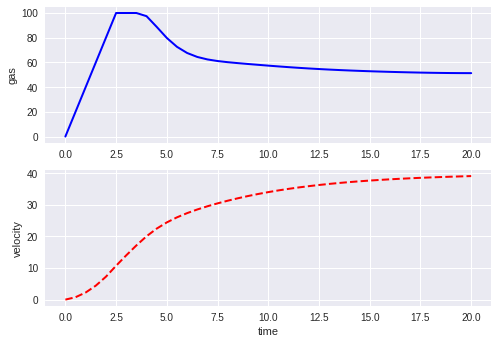

In [4]:
#@markdown Solution in GEKKO

try:
    from pip import main as pipmain
except:
    from pip._internal import main as pipmain
pipmain(['install','gekko'])

#%%Import packages
import numpy as np
from random import random
from gekko import GEKKO
import matplotlib.pyplot as plt

#%% Build model

#initialize GEKKO model
m = GEKKO()

#time
m.time = np.linspace(0,20,41)

#constants
mass = 500

#Parameters
b = m.Param(value=50)
K = m.Param(value=0.8)
#Manipulated variable
p = m.MV(value=0, lb=0, ub=100)

#Controlled Variable
v = m.CV(value=0)

#Equations
m.Equation(mass*v.dt() == -v*b + K*b*p)

#%% Tuning

#global
m.options.IMODE = 6 #control

#MV tuning
p.STATUS = 1 #allow optimizer to change
p.DCOST = 0.1 #smooth out gas pedal movement
p.DMAX = 20 #slow down change of gas pedal

#CV tuning
#setpoint
v.STATUS = 1 #add the SP to the objective
m.options.CV_TYPE = 2 #L2 norm
v.SP = 40 #set point
v.TR_INIT = 1 #setpoint trajectory
v.TAU = 5 #time constant of setpoint trajectory

#%% Solve

m.solve()

#%% Plot solution
plt.figure()
plt.subplot(2,1,1)
plt.plot(m.time,p.value,'b-',LineWidth=2)
plt.ylabel('gas')
plt.subplot(2,1,2)
plt.plot(m.time,v.value,'r--',LineWidth=2)
plt.ylabel('velocity')
plt.xlabel('time')
plt.show()